# Project Milestone 1

## Group - Team 8

### AIT-582 - Metadata Analytics

# Step 1

In [1]:
# Step 1: Import necessary libraries for data handling, analysis, and visualization

# Libraries for data handling and analysis
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version


In [3]:
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

# Step 2

In [4]:
# Step 2: Load and inspect the dataset
# Read the Telco Customer Churn dataset
telco = pd.read_csv('Telco-Customer-Churn.csv')
print("Shape of telco dataframe is: {}".format(telco.shape))

Shape of telco dataframe is: (7043, 21)


In [5]:
# Display first few rows of the dataset to understand its structure
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Making a copy of the original sourcefile
telco_orig = telco.copy()

# Step 3

### Preliminary data cleaning and exploration


In [7]:
# Dataset columns
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Check for missing values in each column
missing_values = telco.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
# let's break down the columns by their type (i.e. int64, float64, object)
telco.columns.to_series().groupby(telco.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

# Step 4

### Data Preprocessing and Analysis

In [10]:
# Step 4: Data Preprocessing

In [11]:
telco.TotalCharges = pd.to_numeric(telco.TotalCharges, errors = 'coerce')
telco.MonthlyCharges = pd.to_numeric(telco.MonthlyCharges, errors = 'coerce')


# Fill the missing values with 0
telco['TotalCharges'] = telco['TotalCharges'].fillna(0.0)
telco['MonthlyCharges'] = telco['MonthlyCharges'].fillna(0.0)

In [12]:
# Check for missing values in each column
missing_values = telco.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [13]:
# Numerical Feature Overview
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


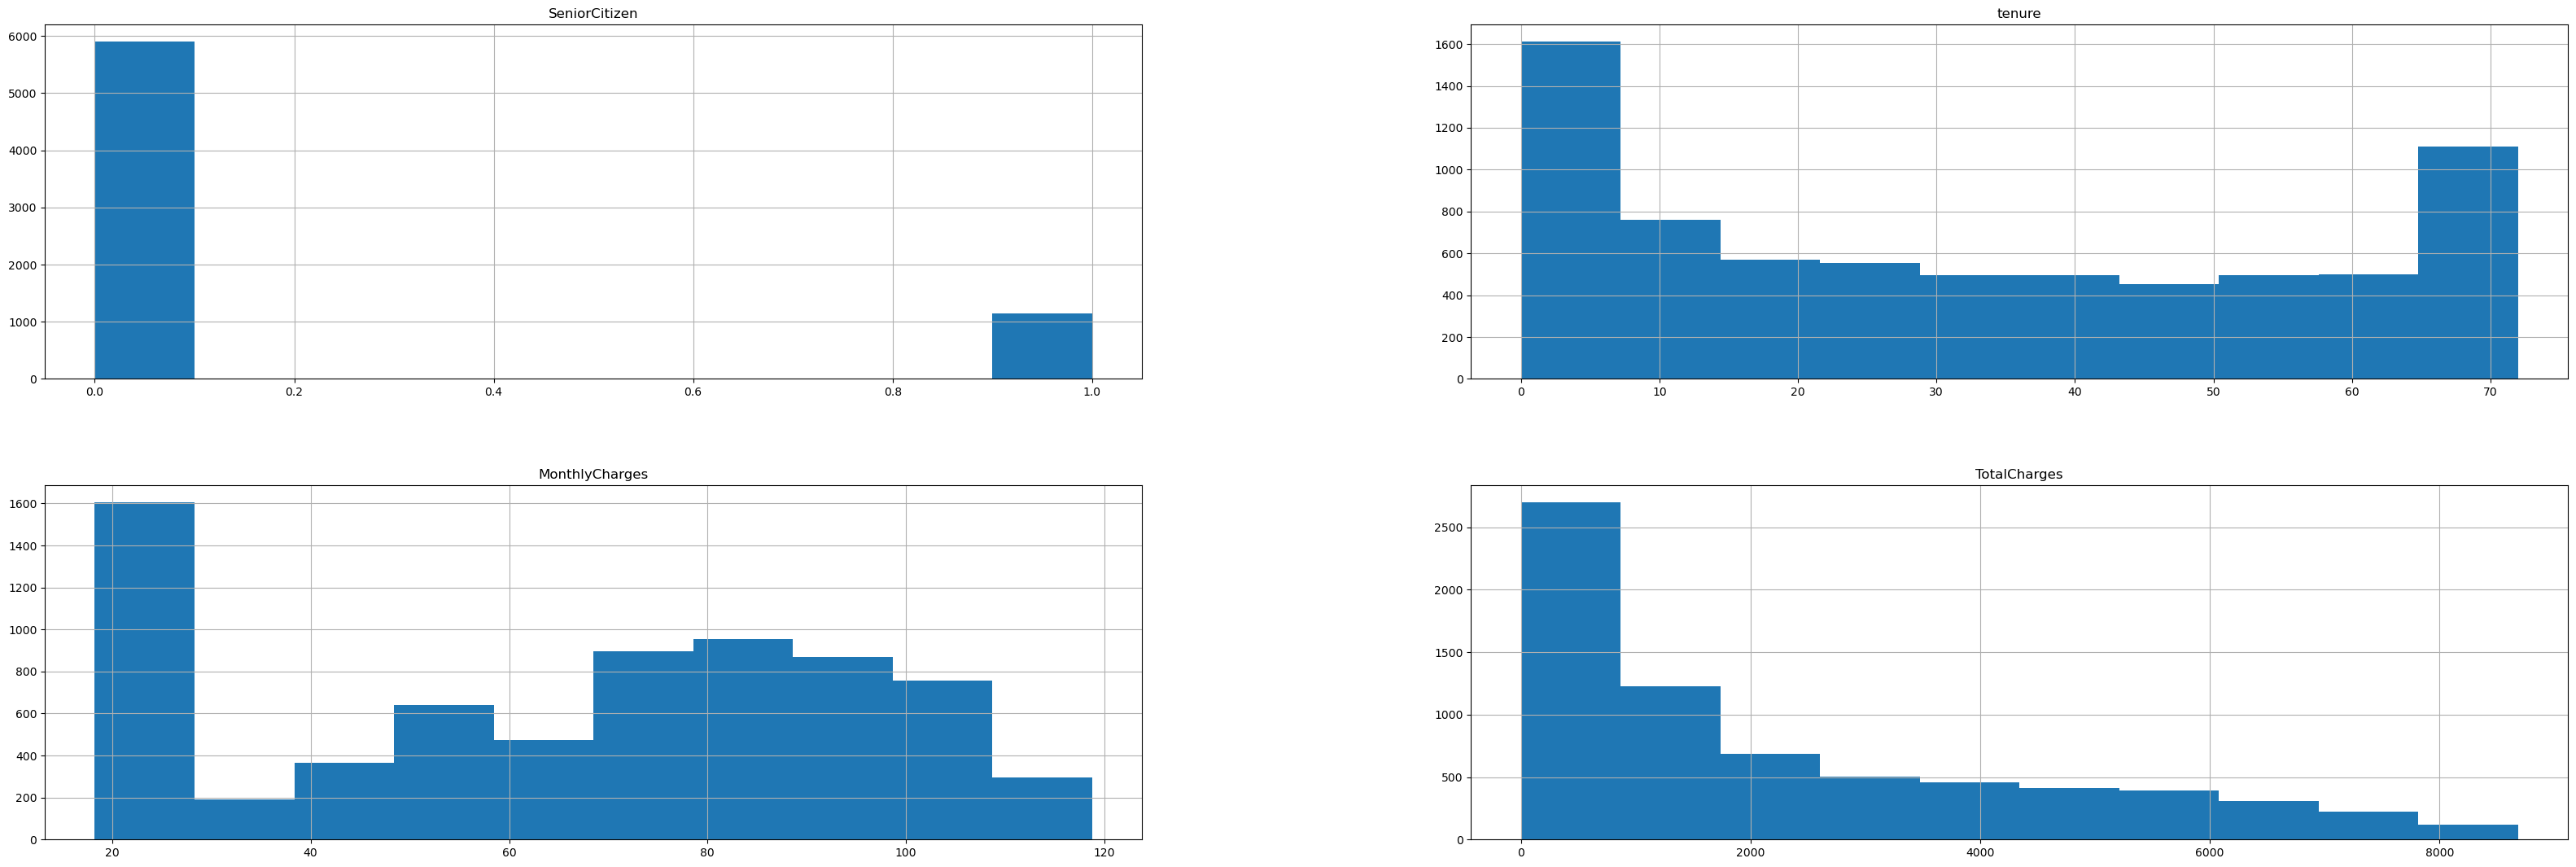

In [14]:
telco.hist(figsize=(40,13))
plt.show()

<Axes: xlabel='Churn', ylabel='TotalCharges'>

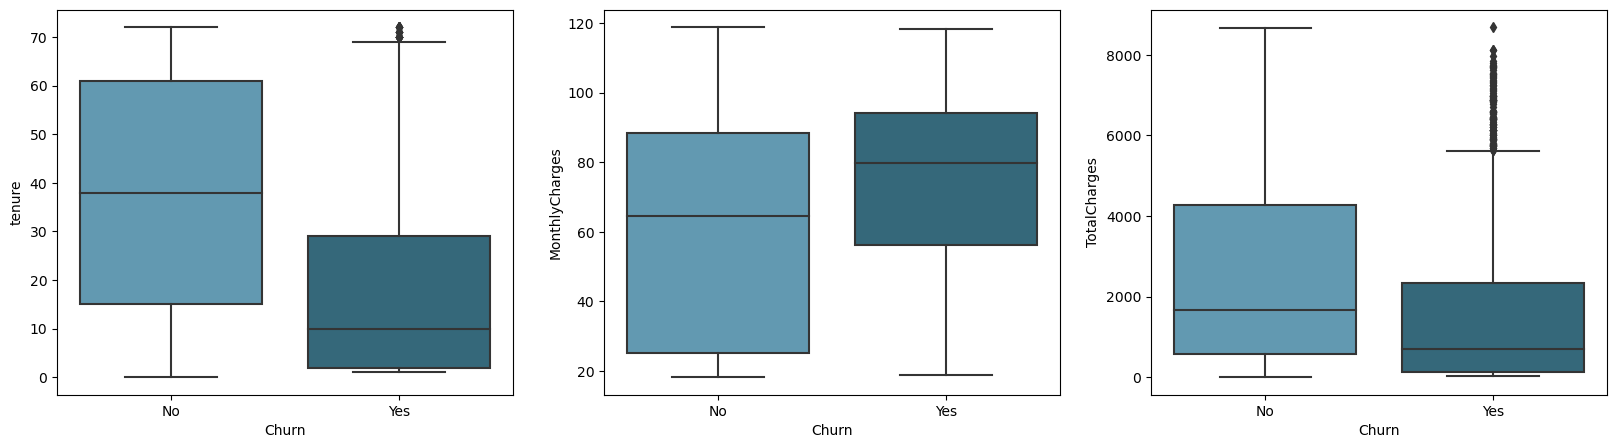

In [15]:
f, axes = plt.subplots( ncols=3, figsize=(20, 5))
sns.boxplot(x="Churn", y="tenure", data=telco,palette='PuBuGn_d',ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=telco,palette='PuBuGn_d',ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=telco,palette='PuBuGn_d',ax = axes[2])

# Distribution by target attribute

#### We are now creating a kernel density estimation (KDE) plot colored by the value of the target. 

#### A kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. 

#### It will allow us to identify if there is a correlation between the tenure of the customer.

Text(0.5, 1.0, 'Tenure Distribution in Percent by Attrition Status')

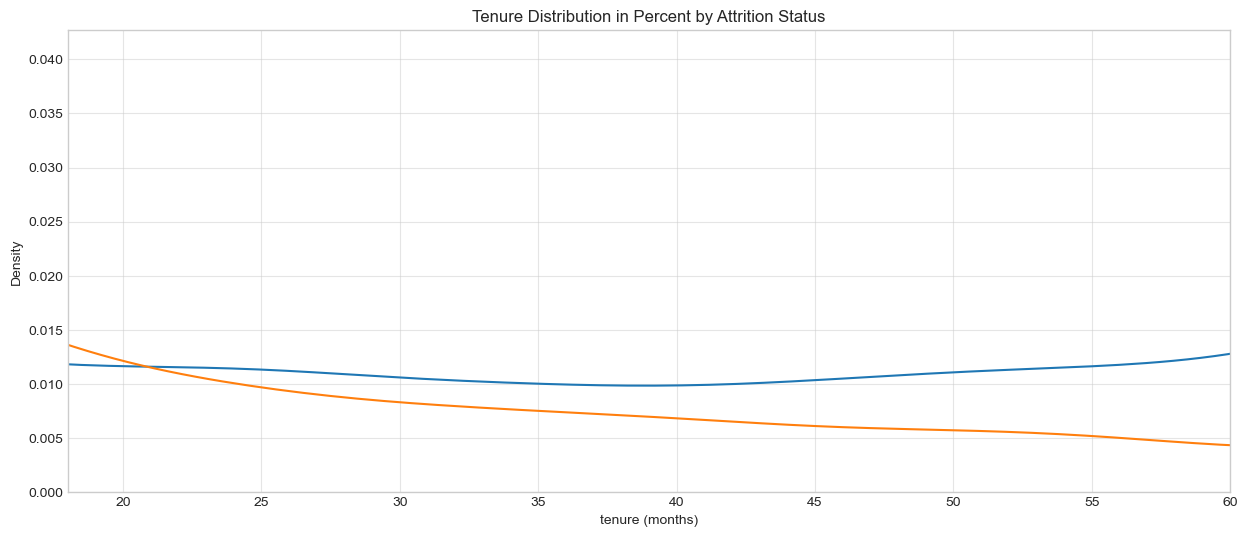

In [16]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-whitegrid')
plt.grid(True, alpha=0.5)
sns.kdeplot(telco.loc[telco['Churn'] == 'No', 'tenure'], label = 'Non-Churn Customer')
sns.kdeplot(telco.loc[telco['Churn'] == 'Yes', 'tenure'], label = 'Churn Customer')
plt.xlim(left=18, right=60)
plt.xlabel('tenure (months)')
plt.ylabel('Density')
plt.title('Tenure Distribution in Percent by Attrition Status')

In [17]:
print('Average period of tenure for churned customers: {:.2f} months and non-churned customers: {:.2f} months'.format(
    telco[telco['Churn'] == 'Yes']['tenure'].mean(), telco[telco['Churn'] == 'No']['tenure'].mean()))

Average period of tenure for churned customers: 17.98 months and non-churned customers: 37.57 months


In [18]:
# # Internet Services for customers
telco['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [19]:
df_InternetService = pd.DataFrame(columns=["Service", "% of Leavers"])
i=0
for service in list(telco['InternetService'].unique()):
    ratio = telco[(telco['InternetService']==service)&(telco['Churn']=="Yes")].shape[0] / telco[telco['InternetService']==service].shape[0]
    df_InternetService.loc[i] = (service, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_IS = df_InternetService.groupby(by="Service").sum()
df_IS.iplot(kind='bar',title='Leavers-The Churned Customers by Internet Service (%)')

In [20]:
df_InternetService = pd.DataFrame(columns=["Service", "% of Leavers"])
i=0
for service in list(telco['InternetService'].unique()):
    ratio = telco[(telco['InternetService']==service)&(telco['Churn']=="No")].shape[0] / telco[telco['InternetService']==service].shape[0]
    df_InternetService.loc[i] = (service, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_IS = df_InternetService.groupby(by="Service").sum()
df_IS.iplot(kind='bar',title='The Non-Churned Customers by Internet Service (%)')

In [21]:
telco['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [22]:
df_Contract = pd.DataFrame(columns=["Contracts", "% of Leavers"])
i=0
for contract in list(telco['Contract'].unique()):
    ratio = telco[(telco['Contract']==contract)&(telco['Churn']=="Yes")].shape[0] / telco[telco['Contract']==contract].shape[0]
    df_Contract.loc[i] = (contract, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_C1 = df_Contract.groupby(by="Contracts").sum()
df_C1.iplot(kind='bar',title='Leavers-The Churned Customers by Contract (%)')

The customer churned by contract is explained based on three terms: Month-to-Month, One Year and Two Year.

It is observed than 42.7% of customer leave if they have month-to-month contract, whereas 11.2% of customer leave if they have one year contract.

Important point here is, Customers who have enrolled in 2 years contract has lower churn rate which 2.8% of customer only churn which explains that having 2 years of contract with customers help in reducing churn rate.

In [23]:
df_Contract = pd.DataFrame(columns=["Contracts", "% of Leavers"])
i=0
for contract in list(telco['Contract'].unique()):
    ratio = telco[(telco['Contract']==contract)&(telco['Churn']=="No")].shape[0] / telco[telco['Contract']==contract].shape[0]
    df_Contract.loc[i] = (contract, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_C2 = df_Contract.groupby(by="Contracts").sum()
df_C2.iplot(kind='bar',title='Leavers -The Non-Churned Customers by Contract (%)')

In The Non-Churned Customers by Contract, it help us understand the customer behavior that 97.2% of customer does not leave if they are in 2 years contract.
88.7% of customer does not leave when they are enrolled in one year contract, whereas month-to-month shows, 57.2% of customer does not leave.

In [24]:
telco['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [25]:
df_PaymentMethod = pd.DataFrame(columns=["PaymentMethods", "% of Leavers"])
i=0
for payment in list(telco['PaymentMethod'].unique()):
    ratio = telco[(telco['PaymentMethod']==payment)&(telco['Churn']=="Yes")].shape[0] / telco[telco['PaymentMethod']==payment].shape[0]
    df_PaymentMethod.loc[i] = (payment, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_PM1 = df_PaymentMethod.groupby(by="PaymentMethods").sum()
df_PM1.iplot(kind='bar',title='Leavers- The Churned Customers by Payment Method (%)')

In [26]:
df_PaymentMethod = pd.DataFrame(columns=["PaymentMethods", "% of Leavers"])
i = 0
for payment in list(telco['PaymentMethod'].unique()):
    ratio = telco[(telco['PaymentMethod'] == payment) & (telco['Churn'] == "No")].shape[0] / telco[telco['PaymentMethod'] == payment].shape[0]
    df_PaymentMethod.loc[i] = (payment, ratio * 100)
    i += 1
df_PM2 = df_PaymentMethod.groupby(by="PaymentMethods").sum()
df_PM2.iplot(kind='bar', title='The Non-Churned Customers by Payment Method (%)')


In [27]:
# 1 = Senior Citizen of telco
telco['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [28]:
# Separating senior and young customers
Young_Citizen     = telco[telco["SeniorCitizen"] == "0"]
Senior_Citizen = telco[telco["SeniorCitizen"] == "1"]

In [29]:
# Senior and Young Citizens of telco
telco['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [30]:
telco['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [31]:
# Separating male and female customers
Male     = telco[telco["gender"] == "0"]
Female = telco[telco["gender"] == "1"]

In [32]:
telco['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [33]:
print("Normalised gender distribution of churned customers in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((telco[(telco['Churn'] == 'Yes') & (
    telco['gender'] == 'Male')].shape[0] / telco[telco['gender'] == 'Male'].shape[0])*100, (telco[(telco['Churn'] == 'Yes') & (telco['gender'] == 'Female')].shape[0] / telco[telco['gender'] == 'Female'].shape[0])*100))

Normalised gender distribution of churned customers in the dataset: Male = 26.2%; Female 26.9%.


In [34]:
#df_gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
#i = 0
#for gender in list(telco['gender'].unique()):
 #   ratio = telco[(telco['gender'] == gender) & (telco['Churn'] == "Yes")].shape[0] / telco[telco['gender'] == gender].shape[0]
  #  df_gender.loc[i] = (gender, ratio * 100)
   # i += 1
#df_G1 = df_gender.groupby(by="Gender").sum()
#df_G1.iplot(kind='bar', title='Leavers - the Churned Customers by Gender (%)')

In [35]:
# Dependents of customers 
telco['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [36]:
#Separating male and female customers
No     = telco[telco["gender"] == "No"]
Yes = telco[telco["gender"] == "Yes"]

In [37]:
telco['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [38]:
# Graph for Dependent

Overall Customer Churn percentage in the given dataset is 26.54 %


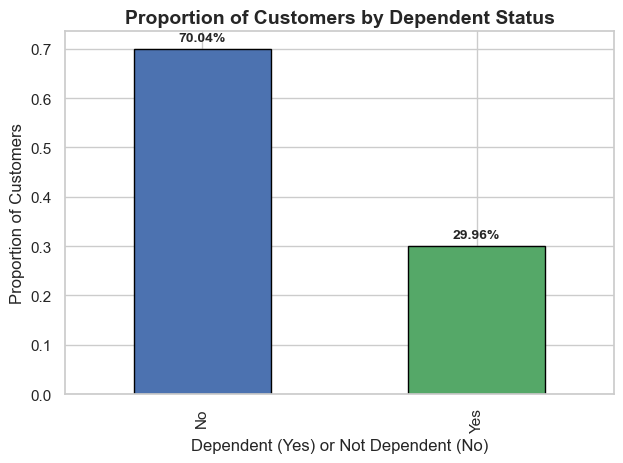

In [39]:
# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Calculate the proportion of customers with and without dependents
proportion = telco.groupby('Dependents')['customerID'].count() / telco['customerID'].count()

# Create the bar plot with a custom color palette
ax = proportion.plot.bar(color=['#4C72B0', '#55A868'], edgecolor='black')

# Add title and labels
plt.title('Proportion of Customers by Dependent Status', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Customers', fontsize=12)
plt.xlabel('Dependent (Yes) or Not Dependent (No)', fontsize=12)

# Add percentage annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 8), 
                textcoords='offset points', fontsize=10, fontweight='bold')

# Display the graph with tight layout
plt.tight_layout()

# Print overall customer churn percentage
churn_percentage = round(telco.Churn.replace({'No': 0, 'Yes': 1}).mean() * 100, 2)
print(f'Overall Customer Churn percentage in the given dataset is {churn_percentage} %')

# Show the plot
plt.show()

29.86% of the customers who have dependent have churned
70.04% of the customers who has no dependent have remained.

Total Revenue Lost/Month due to Churn: $ 139130


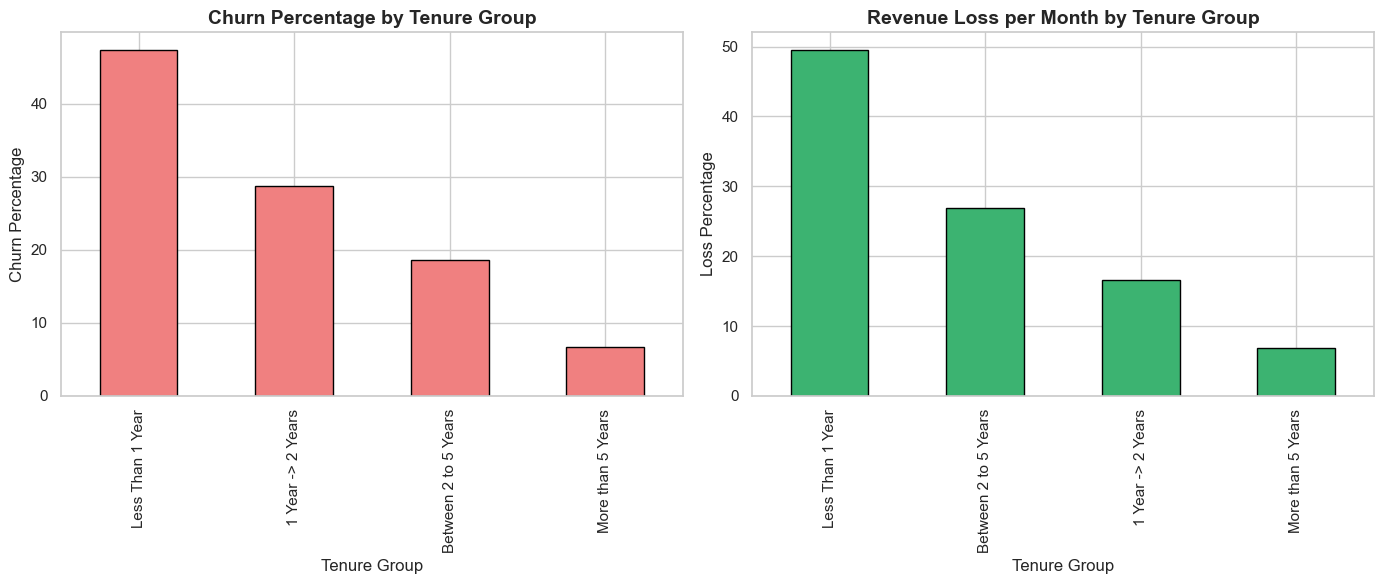

In [40]:
# Split customers into tenure groups and see their Churn Rate
telco['Tenure Group'] = 'Between 2 to 5 Years'
telco.loc[telco['tenure'] > 59, 'Tenure Group'] = 'More than 5 Years'
telco.loc[telco['tenure'] <= 24, 'Tenure Group'] = '1 Year -> 2 Years'
telco.loc[telco['tenure'] <= 12, 'Tenure Group'] = 'Less Than 1 Year'
telco['Ch10'] = telco['Churn'].replace({'Yes': 1, 'No': 0})

# Create subplots for Churn Rate and Revenue Loss
plt.figure(figsize=(14,6))

# Subplot 1: Churn Percentage by Tenure Group
plt.subplot(1, 2, 1)
ch_rate = telco.groupby('Tenure Group')['Ch10'].mean().sort_values(ascending=False)
(round(100 * ch_rate, 2)).plot.bar(color='lightcoral', edgecolor='black')
plt.ylabel('Churn Percentage', fontsize=12)
plt.title('Churn Percentage by Tenure Group', fontsize=14, fontweight='bold')

# Subplot 2: Revenue Loss per Month by Tenure Group
plt.subplot(1, 2, 2)
telco['revloss'] = telco['MonthlyCharges'] * telco['Ch10']
revenue_group = telco.groupby('Tenure Group')['revloss'].sum().sort_values(ascending=False)
(round(100 * revenue_group / revenue_group.sum(), 2)).plot.bar(color='mediumseagreen', edgecolor='black')
plt.ylabel('Loss Percentage', fontsize=12)
plt.title('Revenue Loss per Month by Tenure Group', fontsize=14, fontweight='bold')

# Display the plots
plt.tight_layout()

# Print the total revenue loss per month
print('Total Revenue Lost/Month due to Churn: $', int(revenue_group.sum()))

# Show the plot
plt.show()

The business is losing approx $139k every month as per the current data!

Customers less than 1 year have the highest churn and cause highest loss.

The second and third place are interchanged in the two plots.

In [41]:
# Check the stats for numeric types within Churn and No Churn group
num_var1 = ['tenure']
round(telco.groupby('Churn')[num_var1].describe().T, 2)

Churn              No      Yes
tenure count  5174.00  1869.00
       mean     37.57    17.98
       std      24.11    19.53
       min       0.00     1.00
       25%      15.00     2.00
       50%      38.00    10.00
       75%      61.00    29.00
       max      72.00    72.00

In [42]:
num_var2 = ['MonthlyCharges']
round(telco.groupby('Churn')[num_var2].describe().T,2)

Churn                      No      Yes
MonthlyCharges count  5174.00  1869.00
               mean     61.27    74.44
               std      31.09    24.67
               min      18.25    18.85
               25%      25.10    56.15
               50%      64.43    79.65
               75%      88.40    94.20
               max     118.75   118.35

In [43]:
num_var3 = ['TotalCharges']
round(telco.groupby('Churn')[num_var3].describe().T,2)

Churn                    No      Yes
TotalCharges count  5174.00  1869.00
             mean   2549.91  1531.80
             std    2329.95  1890.82
             min       0.00    18.85
             25%     572.90   134.50
             50%    1679.52   703.55
             75%    4262.85  2331.30
             max    8672.45  8684.80

- Average tenure for Churn group is lower than the other group, which is as expected.
- Average Monthly charges are higher for Churn group, this has to be analyzed further.
- Average Total Charges is higher for loyal group than the churn group.

Mean Tenure of Two Groups:
 Churn
No     37.57
Yes    17.98
Name: tenure, dtype: float64


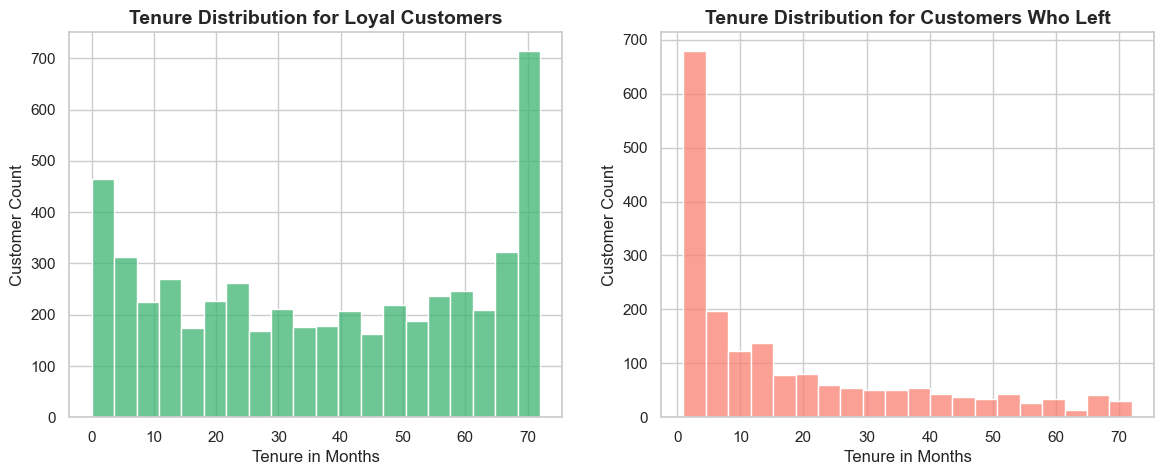

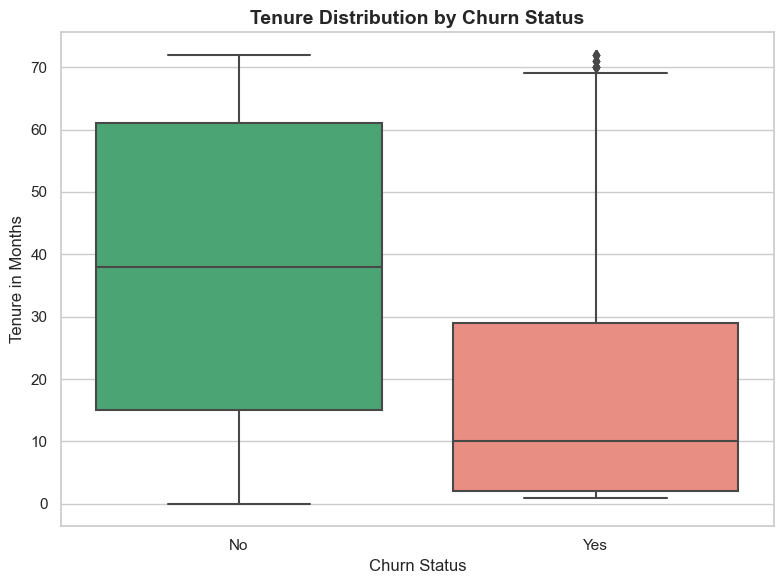

In [44]:
# Set advanced Seaborn style
sns.set(style="whitegrid")

# Plot the histogram of the tenure and see if it tells any story!
fig, ax = plt.subplots(figsize=(14, 5))

# Subplot 1: Histogram for loyal customers
plt.subplot(1, 2, 1)
sns.histplot(telco.loc[telco.Churn == 'No', 'tenure'], color='mediumseagreen', bins=20, kde=False)
plt.title('Tenure Distribution for Loyal Customers', fontsize=14, fontweight='bold')
plt.xlabel('Tenure in Months', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)

# Subplot 2: Histogram for customers who left
plt.subplot(1, 2, 2)
sns.histplot(telco.loc[telco.Churn == 'Yes', 'tenure'], color='salmon', bins=20, kde=False)
plt.title('Tenure Distribution for Customers Who Left', fontsize=14, fontweight='bold')
plt.xlabel('Tenure in Months', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)

# Display mean tenure values for each group
print("Mean Tenure of Two Groups:\n", round(telco.groupby('Churn').tenure.mean(), 2))

# Boxplot to compare tenure distributions by Churn status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=telco, palette=['mediumseagreen', 'salmon'])
plt.title('Tenure Distribution by Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Tenure in Months', fontsize=12)

# Show all plots
plt.tight_layout()
plt.show()

- There is a clear distinction in the shape of the two histograms above. The percentiles are visible in the box plot.

Mean Churn Rate by Contract Type:
 Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Ch10, dtype: float64
Mean Churn Rate by Phone Service:
 PhoneService
No     0.249267
Yes    0.267096
Name: Ch10, dtype: float64
Mean Churn Rate by Internet Service:
 InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Ch10, dtype: float64


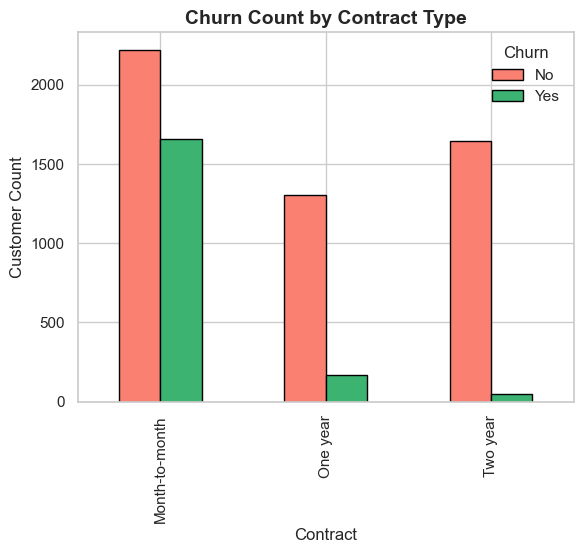

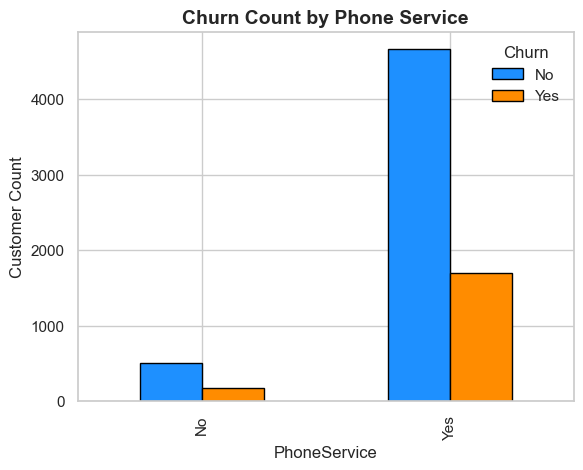

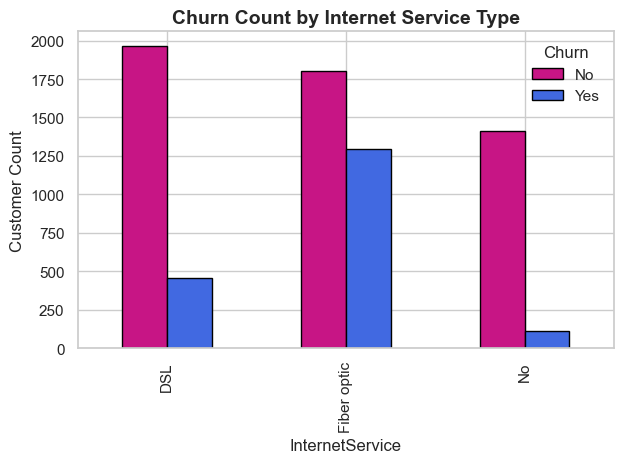

In [45]:
# Plot churn count by contract type
# Using a crosstab to summarize counts of Churn and No Churn by Contract type and plotting as a bar chart
pd.crosstab(telco.Contract, telco.Churn).plot.bar(color=['salmon', 'mediumseagreen'], edgecolor='black')
plt.title('Churn Count by Contract Type', fontsize=14, fontweight='bold')
plt.ylabel('Customer Count', fontsize=12)

# Display mean churn rates for each contract type
print('Mean Churn Rate by Contract Type:\n', telco.groupby('Contract')['Ch10'].mean())

# Plot churn count by phone service type
# Custom colors for better visualization of Churn/No Churn by Phone Service
pd.crosstab(telco.PhoneService, telco.Churn).plot.bar(color=['dodgerblue', 'darkorange'], edgecolor='black')
plt.title('Churn Count by Phone Service', fontsize=14, fontweight='bold')
plt.ylabel('Customer Count', fontsize=12)

# Plot churn count by internet service type
# Using shades for Churn/No Churn by Internet Service categories
pd.crosstab(telco.InternetService, telco.Churn).plot.bar(color=['mediumvioletred', 'royalblue'], edgecolor='black')
plt.title('Churn Count by Internet Service Type', fontsize=14, fontweight='bold')
plt.ylabel('Customer Count', fontsize=12)

# Display mean churn rates for Phone Service and Internet Service
print('Mean Churn Rate by Phone Service:\n', telco.groupby('PhoneService')['Ch10'].mean())
print('Mean Churn Rate by Internet Service:\n', telco.groupby('InternetService')['Ch10'].mean())

# Display all plots with tight layout
plt.tight_layout()
plt.show()

# Streaming TV and Movies and the Partner Differentiations based on Churn and Non-Churn

Mean Churn Rate by Streaming TV Service:
 StreamingTV
No                     0.335231
No internet service    0.074050
Yes                    0.300702
Name: Ch10, dtype: float64


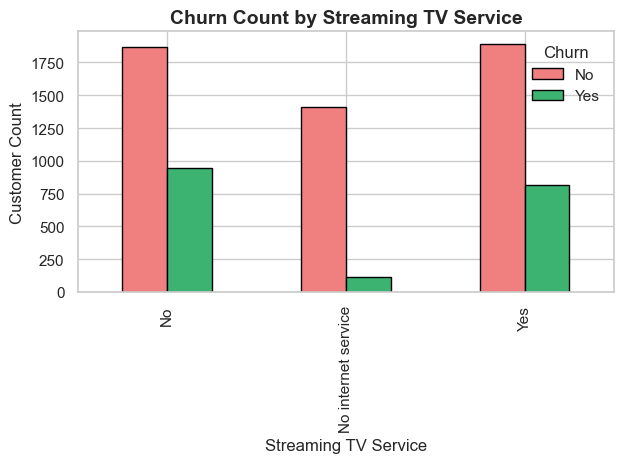

In [46]:
# Plot churn count by Streaming TV service
# Using a crosstab to summarize Churn and No Churn counts by Streaming TV service type and plotting as a bar chart
pd.crosstab(telco.StreamingTV, telco.Churn).plot.bar(color=['lightcoral', 'mediumseagreen'], edgecolor='black')
plt.title('Churn Count by Streaming TV Service', fontsize=14, fontweight='bold')
plt.ylabel('Customer Count', fontsize=12)
plt.xlabel('Streaming TV Service', fontsize=12)

# Display mean churn rate for each Streaming TV group
print('Mean Churn Rate by Streaming TV Service:\n', telco.groupby('StreamingTV')['Ch10'].mean())

# Show the plot
plt.tight_layout()
plt.show()

Mean Churn Rate by Streaming Movies Service:
 StreamingMovies
No                     0.336804
No internet service    0.074050
Yes                    0.299414
Name: Ch10, dtype: float64


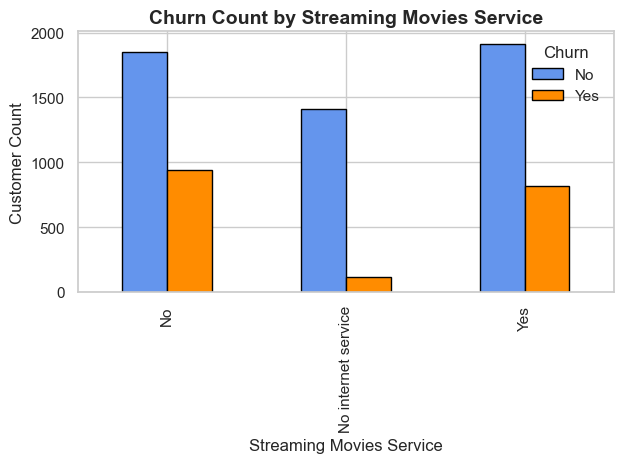

In [47]:
# Plot churn count by Streaming Movies service
# Using a crosstab to show counts of Churn and No Churn by Streaming Movies service type
pd.crosstab(telco.StreamingMovies, telco.Churn).plot.bar(color=['cornflowerblue', 'darkorange'], edgecolor='black')
plt.title('Churn Count by Streaming Movies Service', fontsize=14, fontweight='bold')
plt.ylabel('Customer Count', fontsize=12)
plt.xlabel('Streaming Movies Service', fontsize=12)

# Display mean churn rate for each Streaming Movies group
print('Mean Churn Rate by Streaming Movies Service:\n', telco.groupby('StreamingMovies')['Ch10'].mean())

# Show the plot
plt.tight_layout()
plt.show()

Mean Churn Rate by Partner Status:
 Partner
No     0.329580
Yes    0.196649
Name: Ch10, dtype: float64


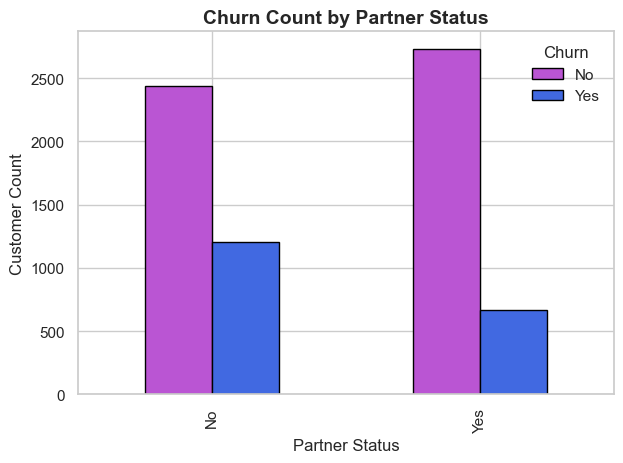

In [48]:
# Plot churn count by Partner status
# Using a crosstab to display counts of Churn and No Churn by whether customers have a partner
pd.crosstab(telco.Partner, telco.Churn).plot.bar(color=['mediumorchid', 'royalblue'], edgecolor='black')
plt.title('Churn Count by Partner Status', fontsize=14, fontweight='bold')
plt.ylabel('Customer Count', fontsize=12)
plt.xlabel('Partner Status', fontsize=12)

# Display mean churn rate for each Partner status
print('Mean Churn Rate by Partner Status:\n', telco.groupby('Partner')['Ch10'].mean())

# Show the plot
plt.tight_layout()
plt.show()


In [49]:
# Display count of each category in MultipleLines and PhoneService columns
# This is to check redundancy and understand distribution within these categories
print("Multiple Lines category counts:\n", telco.MultipleLines.value_counts())
print("\nPhone Service category counts:\n", telco.PhoneService.value_counts())


Multiple Lines category counts:
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Phone Service category counts:
 Yes    6361
No      682
Name: PhoneService, dtype: int64


- Phone service is a subset of multiple lines. It does not contain any new information. Hence we choose to omit it.

In [50]:
# Display counts for each Tenure Group
# This provides an overview of the distribution of customers within each tenure category
print("Tenure Group Counts:\n", telco['Tenure Group'].value_counts())

Tenure Group Counts:
 Between 2 to 5 Years    2350
Less Than 1 Year        2186
More than 5 Years       1483
1 Year -> 2 Years       1024
Name: Tenure Group, dtype: int64


In [51]:
# Calculate percentage of non-churned customers by Tenure Group
# Create a new DataFrame to store Tenure Groups and the percentage of non-churned (loyal) customers
df_Tenure_Group = pd.DataFrame(columns=["TenureGroups", "% of Leavers"])
i = 0

# Loop through each Tenure Group to calculate the percentage of non-churned customers
for tg in telco['Tenure Group'].unique():
    ratio = telco[(telco['Tenure Group'] == tg) & (telco['Churn'] == "No")].shape[0] / telco[telco['Tenure Group'] == tg].shape[0]
    df_Tenure_Group.loc[i] = (tg, ratio * 100)
    i += 1

# Summing up by TenureGroups for clarity
df_TG1 = df_Tenure_Group.groupby(by="TenureGroups").sum()

# Plot percentage of leavers for non-churned customers by tenure group
df_TG1.iplot(kind='bar', title='Non-Churned Customer Percentage by Tenure Group (%)')

In [52]:
# Create a DataFrame to store Tenure Groups and the percentage of churned (leavers) customers
df_Tenure_Group = pd.DataFrame(columns=["TenureGroups", "% of Leavers"])
i = 0

# Loop through each Tenure Group to calculate the percentage of churned customers
for tg in telco['Tenure Group'].unique():
    # Calculate the ratio of churned customers within each Tenure Group
    ratio = telco[(telco['Tenure Group'] == tg) & (telco['Churn'] == "Yes")].shape[0] / telco[telco['Tenure Group'] == tg].shape[0]
    df_Tenure_Group.loc[i] = (tg, ratio * 100)
    i += 1

# Sum up data by TenureGroups for improved readability
df_TG2 = df_Tenure_Group.groupby(by="TenureGroups").sum()

# Plot the percentage of churned customers by tenure group
df_TG2.iplot(kind='bar', title='Percentage of Churned Customers by Tenure Group (%)')


In [53]:
# Display the range of Total Charges for customers
print("Total Charges of customers range from {} to {}.".format(
    telco['TotalCharges'].min(), telco['TotalCharges'].max())
)


Total Charges of customers range from 0.0 to 8684.8.


In [54]:
# Convert TotalCharges column to numeric type, handling non-numeric entries by setting them to NaN
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')


In [55]:
# Calculate and display the average Total Charges for churned vs non-churned customers
avg_churned = telco[telco['Churn'] == 'Yes']['TotalCharges'].mean()
avg_non_churned = telco[telco['Churn'] == 'No']['TotalCharges'].mean()
print("Average Charges for churned customers: {:.2f}, non-churned customers: {:.2f}".format(avg_churned, avg_non_churned))

Average Charges for churned customers: 1531.80, non-churned customers: 2549.91


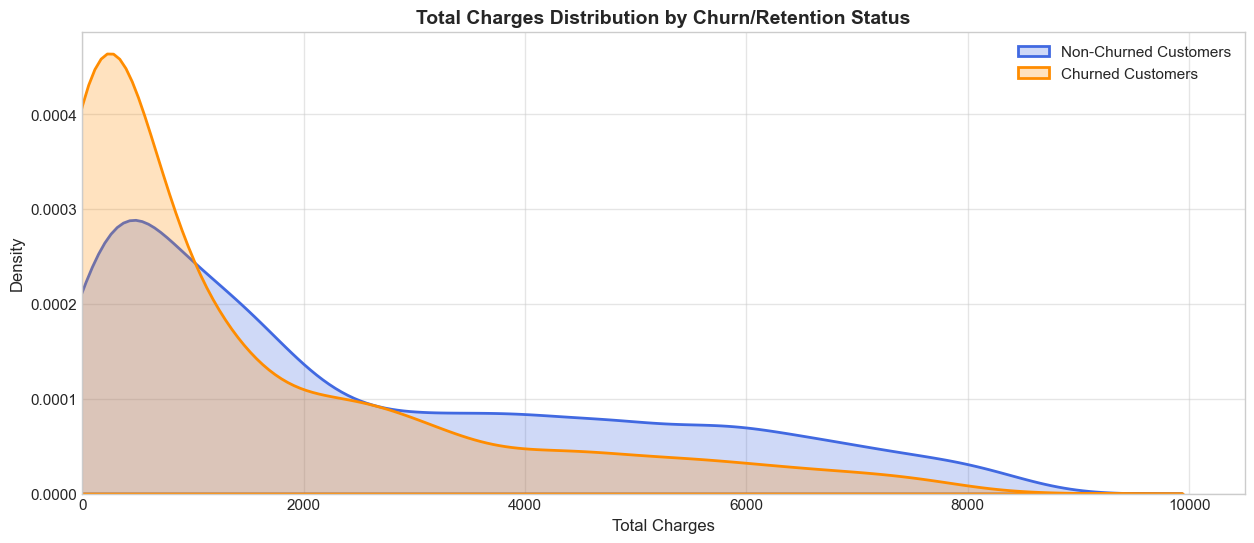

In [56]:
# Set up the plot with a larger figure size and use a clean, grid-based style
plt.figure(figsize=(15,6))
plt.style.use('seaborn-whitegrid')  # Seaborn whitegrid for a clear background with grid lines
plt.grid(True, alpha=0.5)  # Set light gridlines for readability

# Plot Kernel Density Estimate for Total Charges of Non-Churned and Churned Customers
sns.kdeplot(telco.loc[telco['Churn'] == 'No', 'TotalCharges'], 
            label='Non-Churned Customers', color='royalblue', shade=True, linewidth=2)
sns.kdeplot(telco.loc[telco['Churn'] == 'Yes', 'TotalCharges'], 
            label='Churned Customers', color='darkorange', shade=True, linewidth=2)

# Add labels and title
plt.xlabel('Total Charges', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Total Charges Distribution by Churn/Retention Status', fontsize=14, fontweight='bold')
plt.xlim(left=0)  # Set x-axis limit starting from 0 for clarity

# Show the plot
plt.legend()
plt.show()


In [57]:
# Display the range of Monthly Charges
print("Monthly Charges of customers range from ${} to ${}.".format(telco['MonthlyCharges'].min(),
                                                                   telco['MonthlyCharges'].max()))

# Ensure MonthlyCharges column is numeric, converting errors to NaN
telco['MonthlyCharges'] = pd.to_numeric(telco['MonthlyCharges'], errors='coerce')

# Calculate and display the average Monthly Charges for churned and non-churned customers
avg_churned = telco[telco['Churn'] == 'Yes']['MonthlyCharges'].mean()
avg_non_churned = telco[telco['Churn'] == 'No']['MonthlyCharges'].mean()

print('Average Monthly Charges for churned customers: ${:.2f}, and for non-churned customers: ${:.2f}'.format(
    avg_churned, avg_non_churned))


Monthly Charges of customers range from $18.25 to $118.75.
Average Monthly Charges for churned customers: $74.44, and for non-churned customers: $61.27


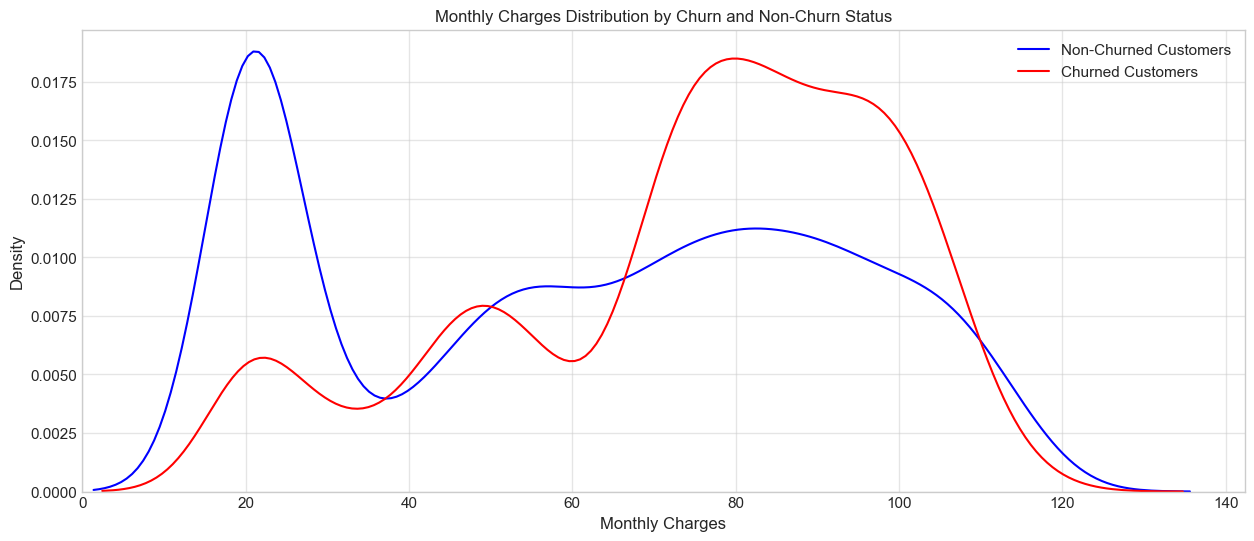

In [58]:
plt.figure(figsize=(15, 6))
plt.style.use('seaborn-whitegrid')
plt.grid(True, alpha=0.5)

# KDE plot for non-churned customers
sns.kdeplot(telco.loc[telco['Churn'] == 'No', 'MonthlyCharges'], label='Non-Churned Customers', color='blue')

# KDE plot for churned customers
sns.kdeplot(telco.loc[telco['Churn'] == 'Yes', 'MonthlyCharges'], label='Churned Customers', color='red')

plt.xlabel('Monthly Charges')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Charges Distribution by Churn and Non-Churn Status')
plt.legend()  # Add a legend to differentiate the groups
plt.show()  # Show the plot


In [59]:
# Calculate and print the percentage of churned and non-churned customers
print("Percentage of Churned Customers: {:.1f}% and Non-Churned Customers: {:.1f}%".format(
    telco[telco['Churn'] == 'Yes'].shape[0] / telco.shape[0] * 100,
    telco[telco['Churn'] == 'No'].shape[0] / telco.shape[0] * 100
))


Percentage of Churned Customers: 26.5% and Non-Churned Customers: 73.5%


In [60]:
# Plot the histogram for Churn distribution
telco['Churn'].iplot(kind='hist', xTitle='Churn',
                     yTitle='Count', title='Attrition Distribution')


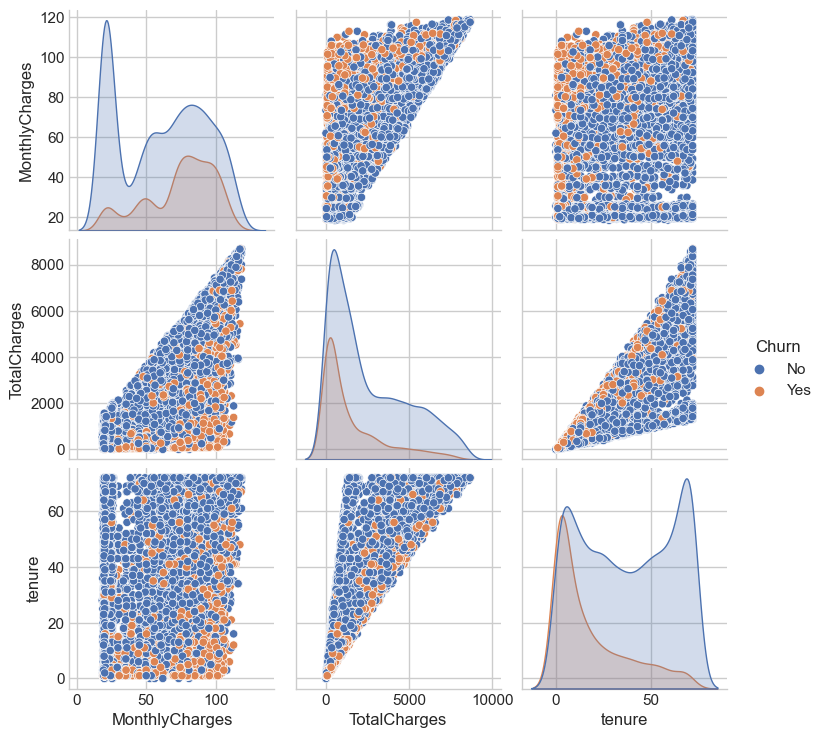

In [61]:
# Generate pairplots for high correlation features
highCorrCols = ['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']
sns.pairplot(telco[highCorrCols], hue='Churn')


# Correlation

- Let's take a look at some of most significant correlations. 
- It is worth remembering that correlation coefficients only measure linear correlations.

In [62]:
# Create a copy of the telco DataFrame for transformation
telco_trans = telco.copy()

# Convert 'Churn' column to numeric: 0 for 'No', 1 for 'Yes'
telco_trans['Churn'] = telco_trans['Churn'].apply(lambda x: 0 if x == 'No' else 1)

# Drop the 'SeniorCitizen' column
telco_trans = telco_trans.drop(['SeniorCitizen'], axis=1)

# Calculate correlations with the target variable and sort
correlations = telco_trans.corr()['Churn'].sort_values()

# Print the most positive and negative correlations
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))


Most Positive Correlations: 
 TotalCharges     -0.198324
MonthlyCharges    0.193356
revloss           0.932759
Churn             1.000000
Ch10              1.000000
Name: Churn, dtype: float64

Most Negative Correlations: 
 tenure           -0.352229
TotalCharges     -0.198324
MonthlyCharges    0.193356
revloss           0.932759
Churn             1.000000
Name: Churn, dtype: float64


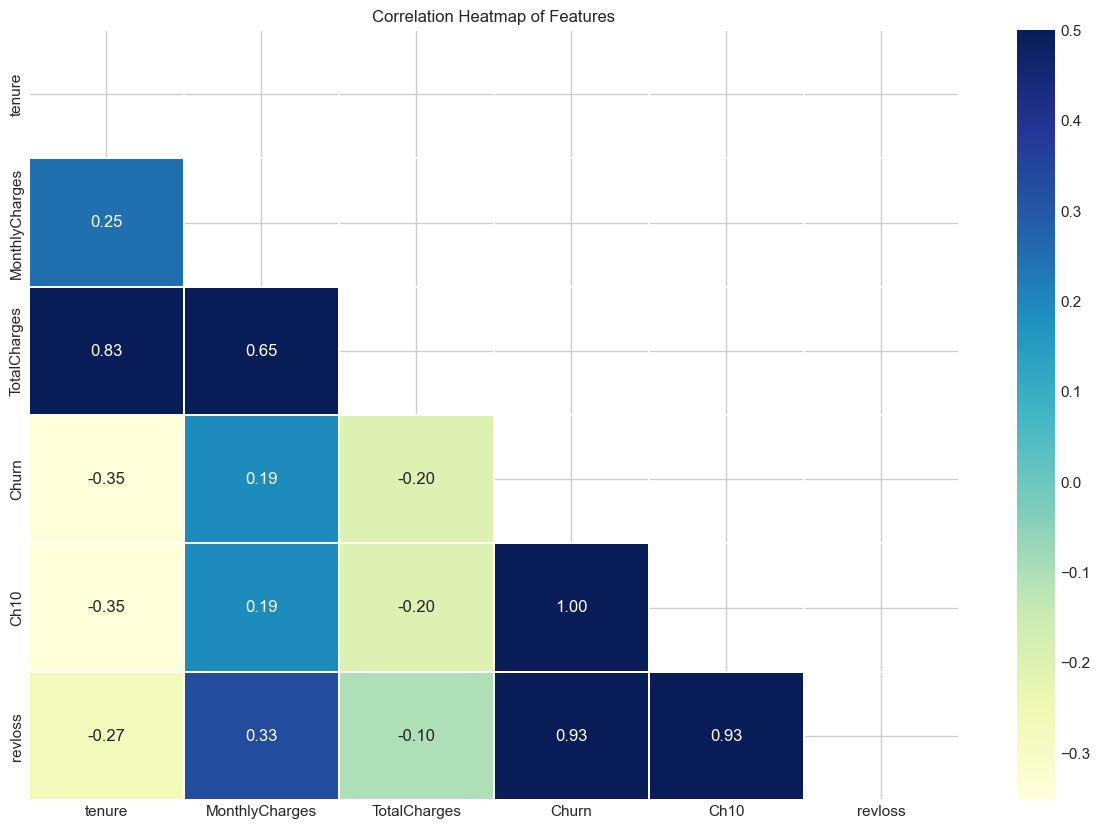

In [63]:
# Calculate correlations
corr = telco_trans.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            annot=True, fmt='.2f',  # To show the correlation values
            linewidths=.2, cmap="YlGnBu")

# Show the plot
plt.title('Correlation Heatmap of Features')
plt.show()

# Data Preprocessing

In [64]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Group,Ch10,revloss
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Less Than 1 Year,0,0.00
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Between 2 to 5 Years,0,0.00
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Less Than 1 Year,1,53.85
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Between 2 to 5 Years,0,0.00
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Less Than 1 Year,1,70.70


In [65]:
telco["TotalCharges"] = telco["TotalCharges"].replace(" ",np.nan)
telco.dropna(inplace = True);

In [66]:
telco = telco.drop(columns=["revloss", "Ch10"])


In [67]:
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'],errors='coerce')

In [68]:
# Identify categorical columns (fewer than 6 unique values)
cat_cols = [x for x in telco.columns if telco[x].nunique() < 6 and x != "Churn"]

# Identify numerical columns (more than 6 unique values)
num_cols = [x for x in telco.columns if telco[x].nunique() > 6 and x != "customerID"]

# Extract customer IDs and labels
id_customer = telco["customerID"]
label = telco["Churn"].apply(lambda x: 1 if x == "Yes" else 0)  # Convert Churn to binary labels

# Display the identified columns for verification
print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)


Categorical Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Tenure Group']
Numerical Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [69]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features for transformation
features_log_transformed = pd.DataFrame(data=telco[num_cols])

# Apply logarithmic transformation (adding 1 to avoid log(0))
features_log_transformed[num_cols] = telco[num_cols].apply(lambda x: np.log(x + 1))

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler and transform the log-transformed features
features_log_minmax_transform = pd.DataFrame(data=features_log_transformed)
features_log_minmax_transform[num_cols] = scaler.fit_transform(features_log_transformed[num_cols])

# Display the transformed features for verification
print(features_log_minmax_transform.head())

     tenure  MonthlyCharges  TotalCharges
0  0.161555        0.258016      0.378098
1  0.828664        0.602917      0.831870
2  0.256059        0.572840      0.517421
3  0.892362        0.443484      0.828989
4  0.256059        0.719396      0.554405


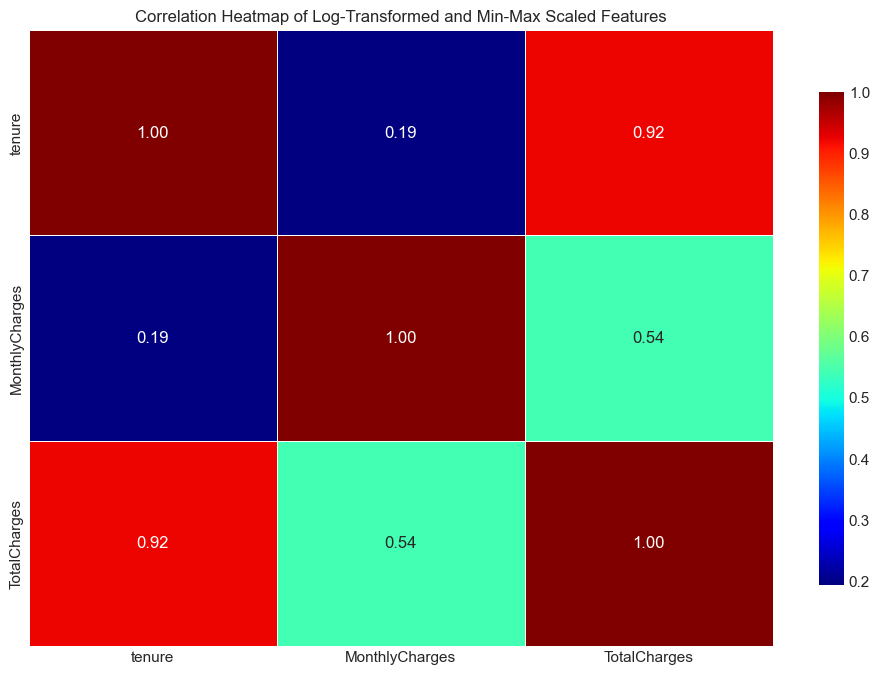

In [70]:
# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(features_log_minmax_transform.corr(), 
            annot=True,        # Annotate the heatmap with correlation coefficients
            cmap='jet',       # Use the 'jet' colormap
            fmt=".2f",        # Format the annotation to two decimal places
            linewidths=.5,    # Add lines between cells for better separation
            cbar_kws={"shrink": .8}  # Adjust color bar size
           )

# Title for the heatmap
plt.title('Correlation Heatmap of Log-Transformed and Min-Max Scaled Features')

# Show the heatmap
plt.show()

In [71]:
# Drop the 'tenure' column from the transformed features DataFrame
features_log_minmax_transform.drop("tenure", inplace=True, axis=1)

# Drop 'MonthlyCharges', 'TotalCharges', and 'tenure' columns from the original telco DataFrame
telco.drop(["MonthlyCharges", "TotalCharges", "tenure"], inplace=True, axis=1)

# Concatenate the modified telco DataFrame with the transformed features DataFrame along the columns
telco = pd.concat([telco, features_log_minmax_transform], axis=1)

# Display the summary information of the updated telco DataFrame
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [72]:
# Display the first five rows of the telco DataFrame
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Tenure Group,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,Less Than 1 Year,0.258016,0.378098
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,Between 2 to 5 Years,0.602917,0.831870
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,Less Than 1 Year,0.572840,0.517421
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,Between 2 to 5 Years,0.443484,0.828989
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,Less Than 1 Year,0.719396,0.554405


In [73]:
# Check for missing values in each column of the telco DataFrame
telco.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
Tenure Group        0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [74]:
# Check for duplicate rows in the telco DataFrame
telco.duplicated().sum()

0

In [75]:
# Drop the 'Churn' column from the telco DataFrame, as it's the target variable
telco.drop("Churn", inplace=True, axis=1)

# Drop the 'customerID' column from the telco DataFrame, as it's not needed for analysis
telco.drop("customerID", inplace=True, axis=1)

# Display the summary information of the updated telco DataFrame
telco.info()

# Convert categorical variables into dummy/indicator variables in the telco DataFrame
telco = pd.get_dummies(data=telco, columns=cat_cols)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  Tenure Group      7043 non-null   object 


In [76]:
# Display the first five rows of the updated telco DataFrame
telco.head()


,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Group_1 Year -> 2 Years,Tenure Group_Between 2 to 5 Years,Tenure Group_Less Than 1 Year,Tenure Group_More than 5 Years
0,0.258016,0.378098,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,0.602917,0.831870,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
2,0.572840,0.517421,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
3,0.443484,0.828989,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0
4,0.719396,0.554405,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [77]:
# Concatenate the modified telco DataFrame with the labels and customer ID for further analysis
telco_original = pd.concat([telco, label, id_customer], axis=1)

# Display the summary information of the combined telco_original DataFrame
telco_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MonthlyCharges                           7043 non-null   float64
 1   TotalCharges                             7043 non-null   float64
 2   gender_Female                            7043 non-null   uint8  
 3   gender_Male                              7043 non-null   uint8  
 4   SeniorCitizen_0                          7043 non-null   uint8  
 5   SeniorCitizen_1                          7043 non-null   uint8  
 6   Partner_No                               7043 non-null   uint8  
 7   Partner_Yes                              7043 non-null   uint8  
 8   Dependents_No                            7043 non-null   uint8  
 9   Dependents_Yes                           7043 non-null   uint8  
 10  PhoneService_No                          7043 no

In [78]:
# Display the first five rows of the telco_original DataFrame
telco_original.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Group_1 Year -> 2 Years,Tenure Group_Between 2 to 5 Years,Tenure Group_Less Than 1 Year,Tenure Group_More than 5 Years,Churn,customerID
0,0.258016,0.378098,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,7590-VHVEG
1,0.602917,0.831870,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,5575-GNVDE
2,0.572840,0.517421,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,3668-QPYBK
3,0.443484,0.828989,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,7795-CFOCW
4,0.719396,0.554405,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,9237-HQITU


# Implement the Algoirthm

In [79]:
# Import the necessary method for splitting the dataset
from sklearn.model_selection import train_test_split

# Implement the Algorithm

# Split the data into training and testing sets
# X contains the features (telco), y contains the labels (Churn)
# test_size defines the proportion of the dataset to include in the test split
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(telco, label, test_size=0.3, random_state=42)

# Output the number of samples in the training set
print("Training set has {} samples.".format(X_train.shape[0]))

# Output the number of samples in the testing set
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 4930 samples.
Testing set has 2113 samples.


In [80]:
# pip install xgboost

In [81]:
# Import machine learning classifiers from sklearn and XGBoost
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from xgboost import XGBClassifier  # XGBoost Classifier for boosted trees

# Import metrics for model evaluation
from sklearn.metrics import confusion_matrix  # Confusion Matrix to evaluate the model
from sklearn.metrics import roc_auc_score, roc_curve  # ROC AUC score and ROC curve for binary classification evaluation
from sklearn.metrics import classification_report  # Classification report for precision, recall, F1-score, and support


In [82]:
def apply_classifier(clsf, Train_x, Test_x, Train_y, Test_y):
    # Fit the classifier
    clsf.fit(Train_x, Train_y)
    
    # Generate predictions
    predictions = clsf.predict(Test_x)
    
    # Calculate probabilities for ROC
    probabilities = clsf.predict_proba(Test_x)[:, 1]  # Probability estimates for the positive class
    
    # Confusion matrix
    confusion_mtrx = confusion_matrix(Test_y, predictions)
    
    # Create a figure for subplots
    f, axes = plt.subplots(ncols=2, figsize=(20, 10))
    
    # Plot confusion matrix
    sns.heatmap(confusion_mtrx, annot=True, cmap='Accent', cbar=False, fmt="g", ax=axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix')
    axes[0].xaxis.set_ticklabels(['Remain', 'Churn'])
    axes[0].yaxis.set_ticklabels(['Remain', 'Churn'])
    
    # Print classification report
    print("\nClassification Report:\n", classification_report(Test_y, predictions))
    
    # Calculate and print the AUC score
    roc_auc = roc_auc_score(Test_y, probabilities) 
    print("Area Under ROC Curve: {:.2f}\n".format(roc_auc))
    
    # ROC curve
    fpr, tpr, _ = roc_curve(Test_y, probabilities)
    
    # Plot ROC curve
    axes[1].plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc), color='blue')
    axes[1].plot([0, 1], [0, 1], color='steelblue', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    
    # Show the plots
    plt.tight_layout()
    plt.show()

# Decision Tree Classification


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1539
           1       0.50      0.50      0.50       574

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113

Area Under ROC Curve: 0.66



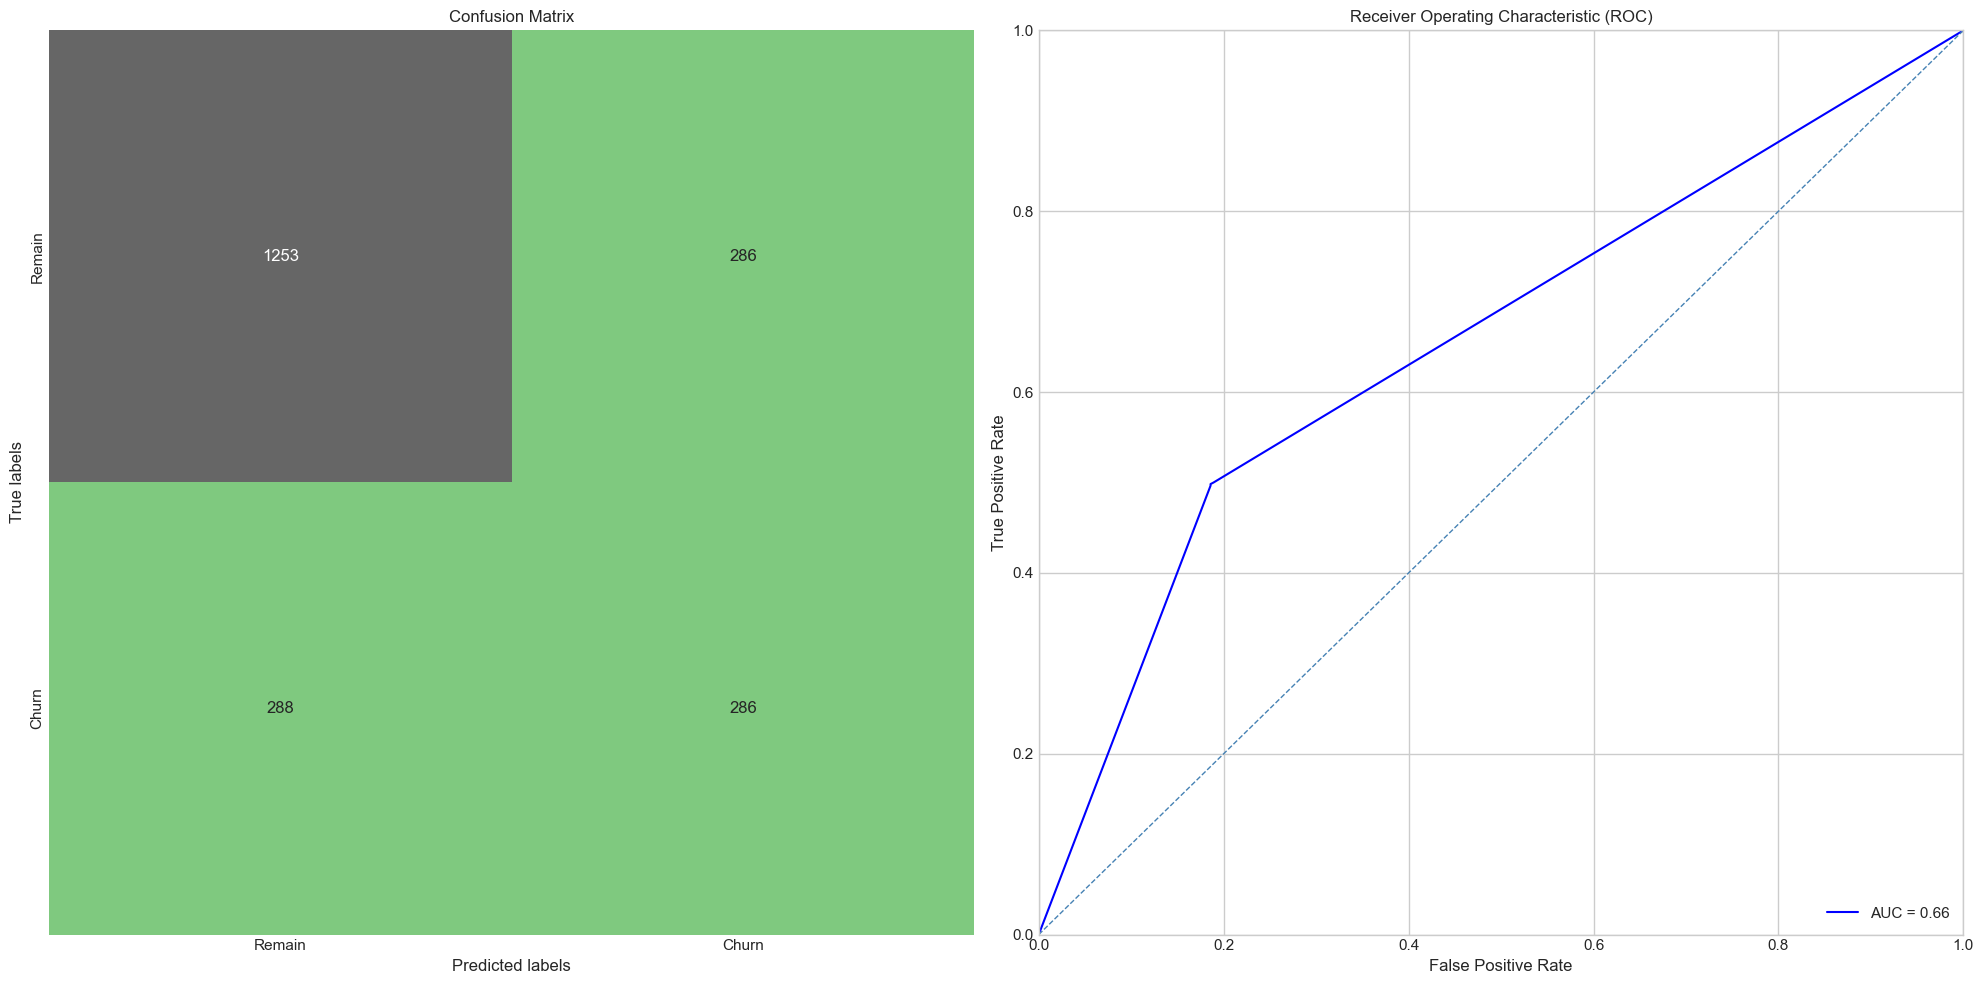

In [83]:
# Instantiate the Decision Tree Classifier
Decision_Tree = DecisionTreeClassifier(random_state=42)

# Apply the classifier to the training and test datasets
apply_classifier(Decision_Tree, X_train, X_test, y_train, y_test)

# Logistic Regression


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.67      0.52      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Area Under ROC Curve: 0.86



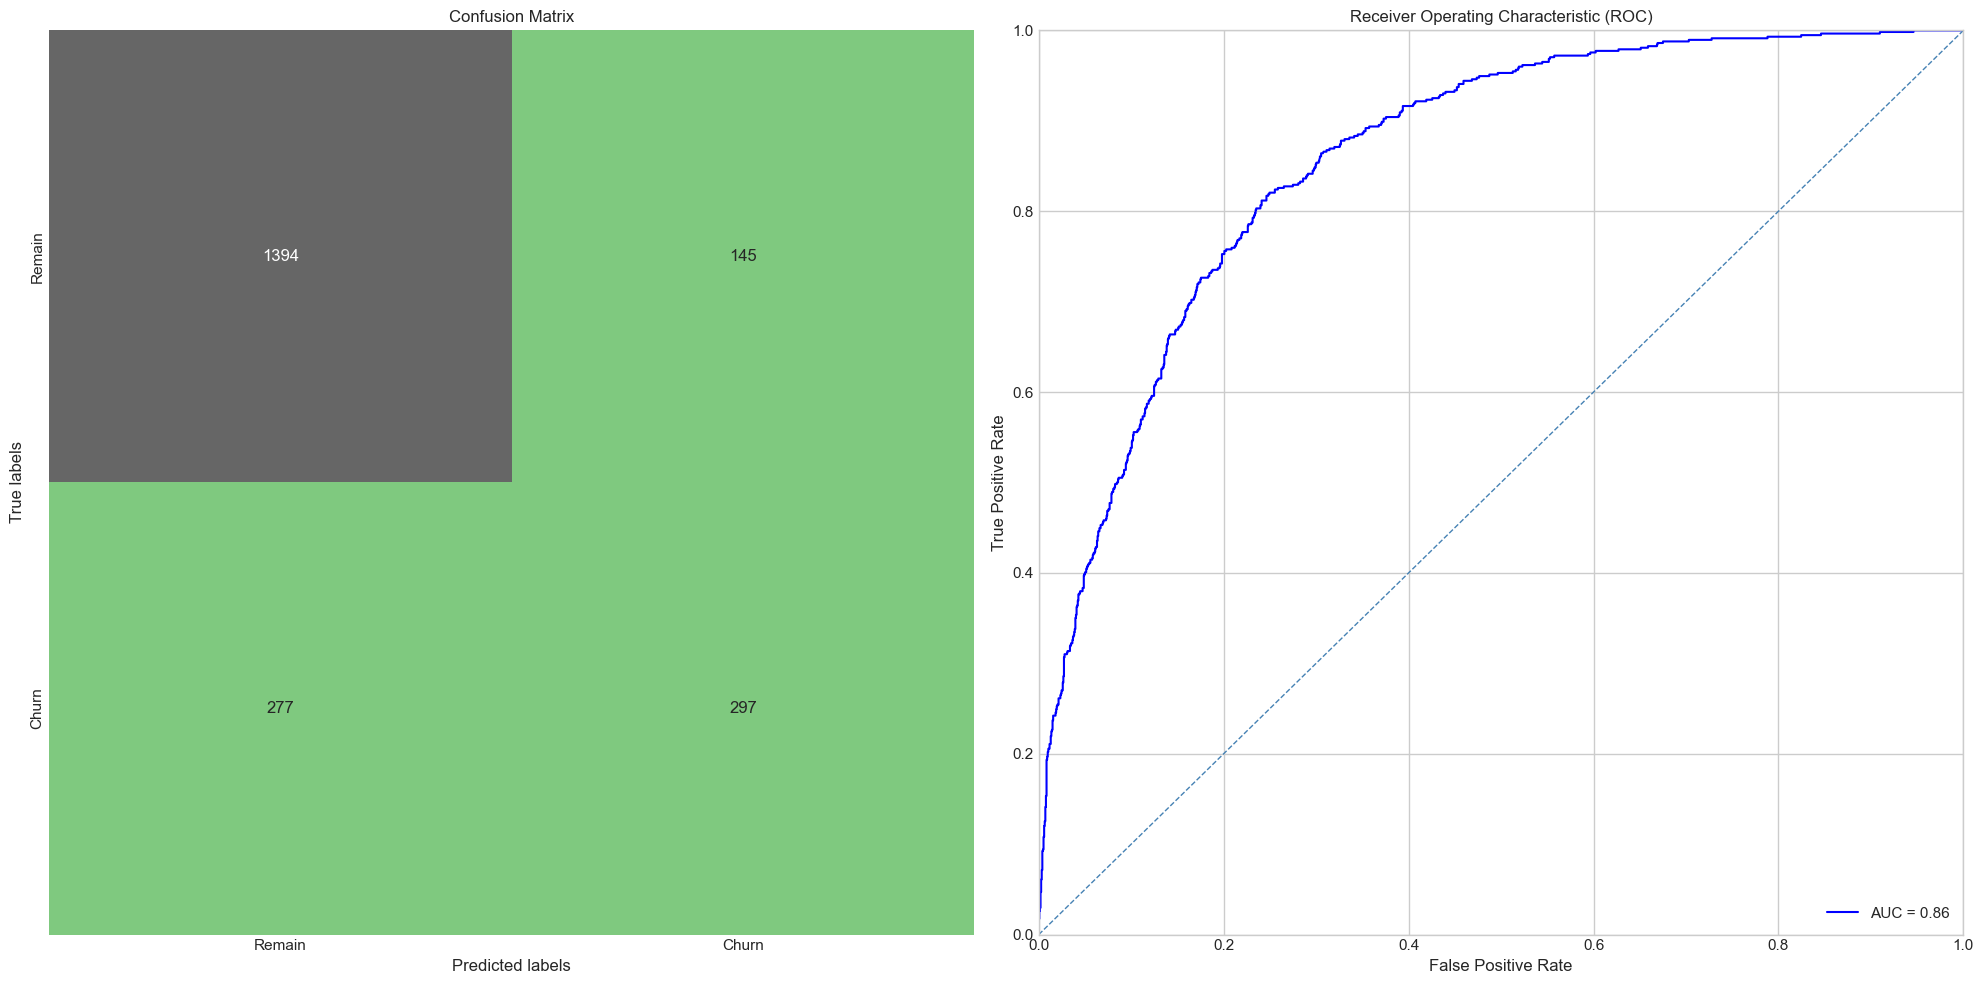

In [84]:
# Instantiate the Logistic Regression Classifier
logistic_reg = LogisticRegression(random_state=42)

# Apply the classifier to the training and test datasets
apply_classifier(logistic_reg, X_train, X_test, y_train, y_test)

# Random Forest Classification


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1539
           1       0.65      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113

Area Under ROC Curve: 0.83



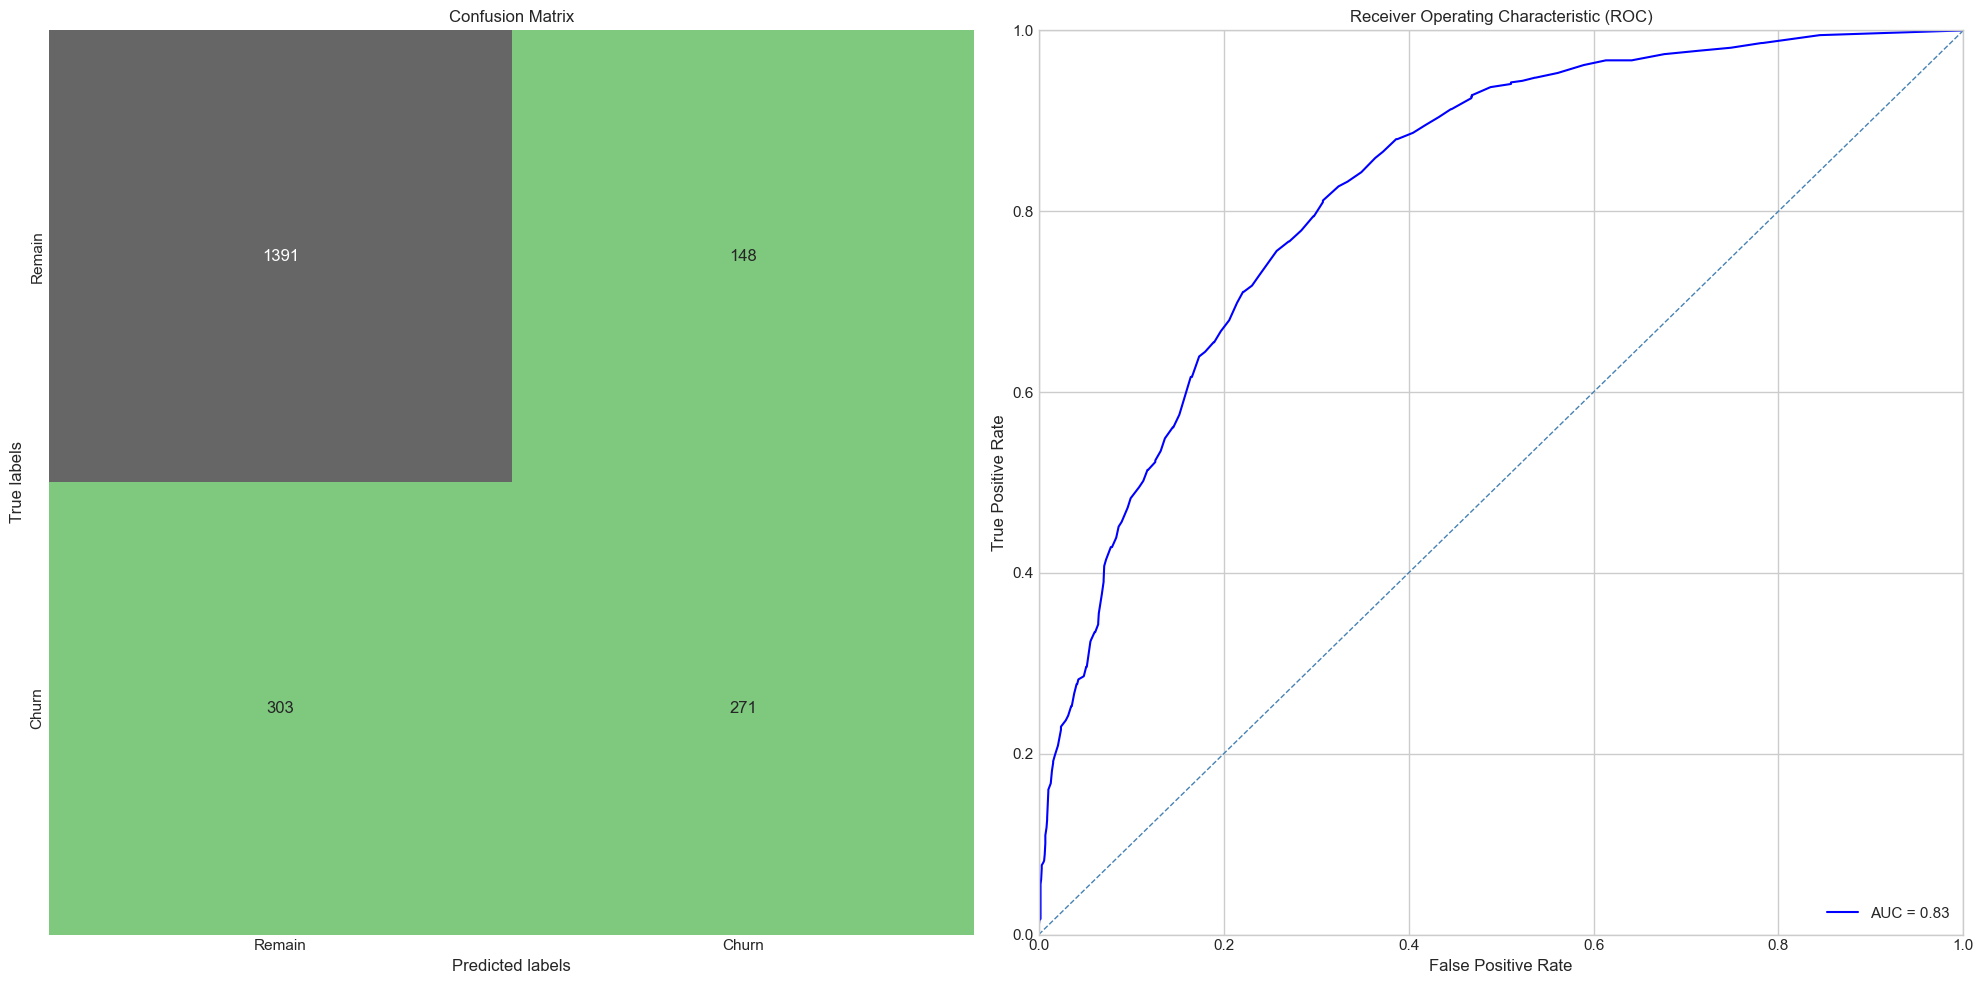

In [85]:
# Instantiate the Random Forest Classifier
Random_Forest = RandomForestClassifier(random_state=42)

# Apply the classifier to the training and test datasets
apply_classifier(Random_Forest, X_train, X_test, y_train, y_test)

# Tuning Parameters

In [86]:
from sklearn.model_selection import GridSearchCV


In [87]:
Decision_Tree_parameters = {"max_depth": [3,4,5,6],
                   "min_samples_leaf":[1,2,3,4]}

Logistic_Reg_parameters = {
    "C": [0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 10.0],
    "solver": ["newton-cg", "lbfgs", "sag", "saga"],
    "tol": [0.01, 0.001, 0.0001, 0.00001],
    "warm_start": [True, False]  # Use boolean values
}

Random_Forest_parameters = {
    "n_estimators" :[10,15,20,25,30], 
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]}

In [88]:
from sklearn.model_selection import GridSearchCV

def grid_search(clsf, parameters, X_train, y_train):
    """
    Performs grid search on the provided classifier and parameters.
    
    Parameters:
    clsf: The classifier to be used for grid search (e.g., DecisionTreeClassifier, LogisticRegression).
    parameters: A dictionary containing parameters to be tuned.
    X_train: Training feature set.
    y_train: Training labels.
    
    Returns:
    best_clsf: The best classifier found by grid search.
    best_params: The best parameters for the classifier.
    best_score: The best score achieved by the best classifier.
    """
    
    # Create the GridSearchCV object
    grid_object = GridSearchCV(clsf, parameters, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
    
    # Fit the grid search to the training data
    fit_grid = grid_object.fit(X_train, y_train)
    
    # Get the best classifier, parameters, and score
    best_clsf = fit_grid.best_estimator_
    best_params = fit_grid.best_params_
    best_score = fit_grid.best_score_
    
    print(f"Best parameters: {best_params}")
    print(f"Best ROC AUC score: {best_score:.4f}")
    
    return best_clsf, best_params, best_score

In [89]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
best_decision_tree, best_decision_tree_params, best_decision_tree_score = grid_search(decision_tree, Decision_Tree_parameters, X_train, y_train)

# Logistic Regression
logistic_reg = LogisticRegression(random_state=42)
best_logistic_reg, best_logistic_reg_params, best_logistic_reg_score = grid_search(logistic_reg, Logistic_Reg_parameters, X_train, y_train)

# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
best_random_forest, best_random_forest_params, best_random_forest_score = grid_search(random_forest, Random_Forest_parameters, X_train, y_train)

# Now best_random_forest is the best model found by grid search


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 2}
Best ROC AUC score: 0.8273
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best parameters: {'C': 4.0, 'solver': 'sag', 'tol': 0.01, 'warm_start': True}
Best ROC AUC score: 0.8446
Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 16, 'n_estimators': 30}
Best ROC AUC score: 0.8393


In [90]:
# Attempt to perform grid search for Logistic Regression
try:
    logistic_reg = LogisticRegression(random_state=42)
    best_logistic_reg = grid_search(logistic_reg, Logistic_Reg_parameters, X_train, y_train)
    print("Best Logistic Regression Model:", best_logistic_reg)
except ValueError as e:
    print(f"ValueError encountered: {e}")


Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best parameters: {'C': 4.0, 'solver': 'sag', 'tol': 0.01, 'warm_start': True}
Best ROC AUC score: 0.8446
Best Logistic Regression Model: (LogisticRegression(C=4.0, random_state=42, solver='sag', tol=0.01,
                   warm_start=True), {'C': 4.0, 'solver': 'sag', 'tol': 0.01, 'warm_start': True}, 0.844608668405092)


# Final Model

In [91]:
# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
best_random_forest, best_random_forest_params, best_random_forest_score = grid_search(random_forest, Random_Forest_parameters, X_train, y_train)

# Now best_random_forest is the best model found by grid search

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 16, 'n_estimators': 30}
Best ROC AUC score: 0.8393


In [92]:
from sklearn.ensemble import AdaBoostClassifier

# Assuming Random_Forest_Grid is the best estimator obtained from the grid search
try:
    # Create an AdaBoost classifier with RandomForest as base estimator
    Final_Model = AdaBoostClassifier(base_estimator=Random_Forest_Grid, n_estimators=4)
    
    # Apply the classifier
    apply_classifier(Final_Model, X_train, X_test, y_train, y_test)
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: name 'Random_Forest_Grid' is not defined


# Feature Importance

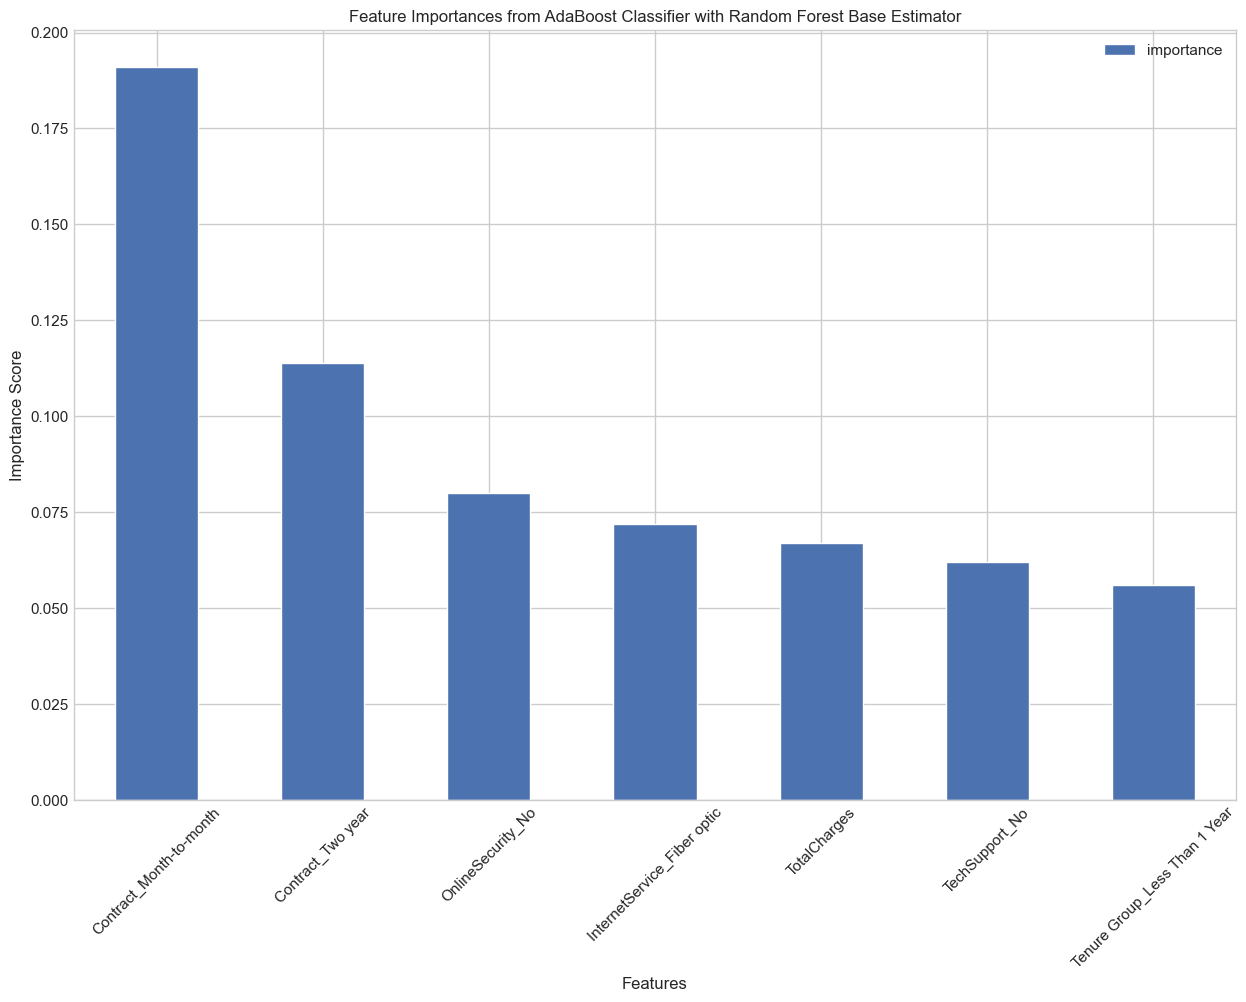

In [94]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the optimized random forest model from grid search is assigned to Final_Model
Final_Model = AdaBoostClassifier(base_estimator=best_random_forest, n_estimators=4, random_state=42)

# Fit Final_Model to the training data
Final_Model.fit(X_train, y_train)

# Feature importances are derived from best_random_forest
importances = pd.DataFrame({
    'feature': telco.columns, 
    'importance': np.round(best_random_forest.feature_importances_, 3)
})

# Sort the DataFrame by importance and set the feature as the index
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# Plot the top 7 features
importances[0:7].plot.bar(figsize=(15, 10))
plt.title('Feature Importances from AdaBoost Classifier with Random Forest Base Estimator')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()
